In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Configuración warnings
# ==============================================================================
import warnings
#warnings.filterwarnings('ignore')

In [2]:
# Descarga de datos
# ==============================================================================
from datetime import datetime
import yfinance as yf

stocks = ["BTC-USD", "ETH-USD", "DAI-ARS"]
start = '2016-01-01'
end = datetime.now()
data = yf.download(stocks, start=start, end=end)
d1 = data.copy()

[*********************100%***********************]  3 of 3 completed

1 Failed download:
- DAI-ARS: No data found, symbol may be delisted


In [3]:
import pandas as pd
datos= d1.copy()
datos.reset_index(level=0, inplace=True)
datos['Date'] = pd.to_datetime(datos['Date'])
datos = datos.set_index('Date')
#datos.set_axis(datos['Date'], inplace=True)
#datos.drop(columns=['Open', 'Date','High', 'Low', 'Volume'], inplace=True)
#datos.reset_index(level=0, inplace=True)
datos = datos.rename(columns={'Close': 'y'})
datos = datos.asfreq('1D')
datos = datos.sort_index()
datos.head()

Adj Close                           y                  \
               BTC-USD DAI-ARS ETH-USD     BTC-USD DAI-ARS ETH-USD   
Date                                                                 
2016-01-01  434.334015     NaN     NaN  434.334015     NaN     NaN   
2016-01-02  433.437988     NaN     NaN  433.437988     NaN     NaN   
2016-01-03  430.010986     NaN     NaN  430.010986     NaN     NaN   
2016-01-04  433.091003     NaN     NaN  433.091003     NaN     NaN   
2016-01-05  431.959991     NaN     NaN  431.959991     NaN     NaN   

                  High                         Low                  \
               BTC-USD DAI-ARS ETH-USD     BTC-USD DAI-ARS ETH-USD   
Date                                                                 
2016-01-01  436.246002     NaN     NaN  427.515015     NaN     NaN   
2016-01-02  436.062012     NaN     NaN  431.869995     NaN     NaN   
2016-01-03  433.743011     NaN     NaN  424.705994     NaN     NaN   
2016-01-04  434.516998     NaN     NaN  429.084015     NaN     NaN   
2016-01-05  434.182007     NaN     NaN  429.675995     NaN     NaN   

                  Open                    Volume                  
               BTC-USD DAI-ARS ETH-USD   BTC-USD DAI-ARS ETH-USD  
Date                                                              
2016-01-01  430.721008     NaN     NaN  36278900     NaN     NaN  
2016-01-02  434.622009     NaN     NaN  30096600     NaN     NaN  
2016-01-03  433.578003     NaN     NaN  39633800     NaN     NaN  
2016-01-04  430.061005     NaN     NaN  38477500     NaN     NaN  
2016-01-05  433.069000     NaN     NaN  34522600     NaN     NaN

In [4]:
# select dates from last week
import datetime

inicio = (datetime.datetime.today() - datetime.timedelta(days=16)).__format__('%Y-%m-%d')
fin = datetime.datetime.today().__format__('%Y-%m-%d')
#print(inicio, fin)
datos = datos.loc[inicio:fin]

df = datos.y.copy()
df.reset_index(level=0, inplace=True)
df.describe()


BTC-USD  DAI-ARS      ETH-USD
count     17.000000      0.0    17.000000
mean   42648.618566      NaN  2964.157327
std     2795.469175      NaN   259.204342
min    37849.664062      NaN  2518.944580
25%    41077.996094      NaN  2814.854492
50%    42190.652344      NaN  2946.257080
75%    44348.730469      NaN  3108.062012
max    47747.621094      NaN  3433.615479

In [6]:
asset = 'BTC-USD'
#asset = 'ETH-USD'

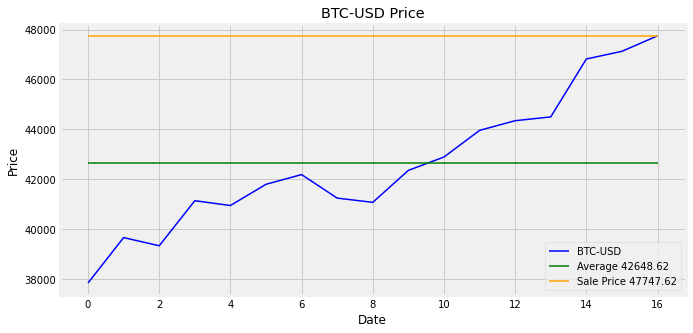

In [7]:
df['avg'] = df[asset].mean()
#df['sale_price'] = df['BTC-USD'].mean() + df['BTC-USD'].std()
df['sale_price'] = df[asset].max()

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

#plot line chart with BTC price
plt.figure(figsize=(10,5))
plt.plot(df[asset], color='blue', label=asset)
#add line with moving average
plt.plot(df['avg'], color='green', label='Average'+' '+str(round(df['avg'].mean(),2)))
plt.plot(df['sale_price'], color='orange', label='Sale Price'+' '+str(round(df['sale_price'].mean(),2)))
plt.title(asset+' Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



In [9]:
#delta = (df[asset].max() - df[asset].mean()) / df[asset].mean() * 100
delta = (47500 - df[asset].mean()) / df[asset].mean() * 100
print('Delta semanal:', round(delta,2), '%')



Delta semanal: 11.38 %
